<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [19]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [20]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [21]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [22]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [23]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tsla = yf.Ticker("TSLA")

# Extract stock information
tesla_data = tsla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Step 2: Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Extract the table with Tesla Revenue
# If you're using BeautifulSoup to directly parse the table, it might look something like this:
# But as per the instructions, we're suggested to use pd.read_html which is much simpler for this task
tables = pd.read_html(html_data)  # This will get all tables contained in the webpage

# Assuming the Tesla revenue table is at index 1 based on your instructions
tesla_revenue = tables[1]  # Adjust the index if needed to select the correct table


# Step 5: Remove rows with empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)

# Display the last five rows of the DataFrame
print(tesla_revenue.tail())


   Tesla Quarterly Revenue(Millions of US $)  \
48                                2010-09-30   
49                                2010-06-30   
50                                2010-03-31   
52                                2009-09-30   
53                                2009-06-30   

   Tesla Quarterly Revenue(Millions of US $).1  
48                                         $31  
49                                         $28  
50                                         $21  
52                                         $46  
53                                         $27  


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


Execute the following lines to remove an null or empty strings in the Revenue column.


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [25]:
# First, you need to install the yfinance package. You can do this by running:
# !pip install yfinance

# Importing necessary libraries
import yfinance as yf

# Creating a ticker object for Tesla
GameStop = yf.Ticker("GME")

# Extracting stock information
GME_data = GameStop.history(period="max")

# Resetting the index
GME_data.reset_index(inplace=True)

# Displaying the first five rows
print(GME_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

# Step 2: Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Extract the GameStop revenue table into a DataFrame using read_html
# Since the table is at index 1 according to your instructions, we directly access it
gme_revenue = pd.read_html(html_data)[1]  # This assumes that the revenue table is the second table on the page

# The DataFrame should already have columns Date and Revenue, but let's ensure the Revenue column is cleaned

# Step 5: Remove any null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)

# Step 6: Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())


   GameStop Quarterly Revenue(Millions of US $)  \
57                                   2006-01-31   
58                                   2005-10-31   
59                                   2005-07-31   
60                                   2005-04-30   
61                                   2005-01-31   

   GameStop Quarterly Revenue(Millions of US $).1  
57                                         $1,667  
58                                           $534  
59                                           $416  
60                                           $475  
61                                           $709  


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


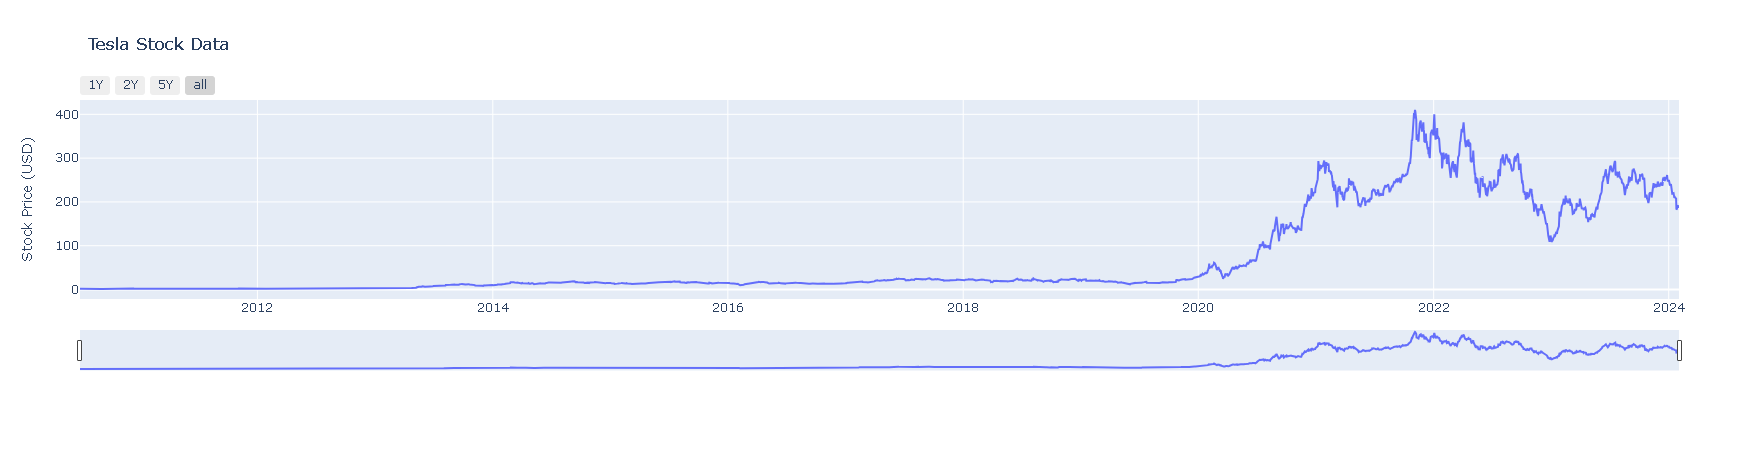

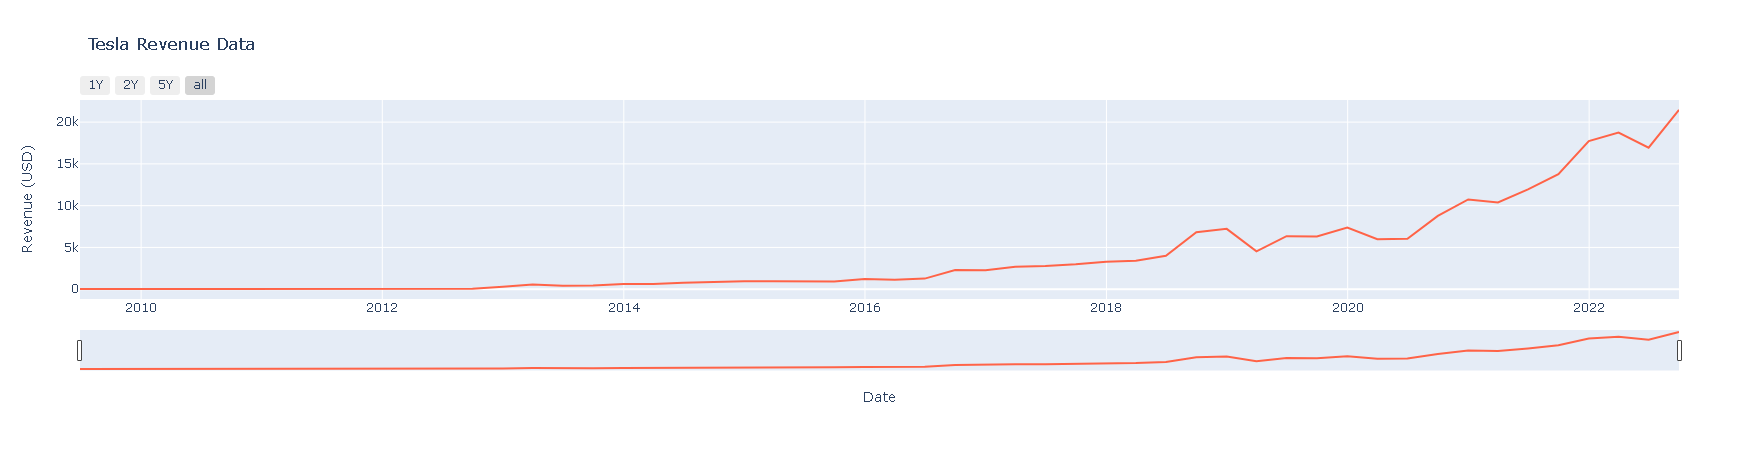

In [113]:
import plotly.graph_objects as go

# Assuming tesla_data and tesla_revenue are pre-defined DataFrames
# with 'Date', 'Close', and 'Revenue' columns in the correct format.

# First plot: Historical Share Price with a range slider
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], name="Close")
)

# Add range slider
fig.update_layout(
    title="Tesla Stock Data",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(count=2, label="2Y", step="year", stepmode="backward"),
                dict(count=5, label="5Y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis_title='Stock Price (USD)'
)
tesla_revenue.sort_values('Tesla Quarterly Revenue(Millions of US $)', inplace=True)

# Second plot: Historical Revenue
fig2 = go.Figure()
fig2.add_trace(
    go.Scatter(x=tesla_revenue['Tesla Quarterly Revenue(Millions of US $)'], y=tesla_revenue['Tesla Quarterly Revenue(Millions of US $).1'], name="Revenue", marker_color='rgb(255, 99, 71)')
)

# Update layout for the second plot
fig2.update_layout(
    title="Tesla Revenue Data",
    xaxis_title="Date",
    yaxis_title='Revenue (USD)',
                   xaxis=dict(rangeselector=dict(buttons=[dict(count=1, label='1Y', step='year', stepmode='backward'),
                                                          dict(count=2, label='2Y', step='year', stepmode='backward'),
                                                          dict(count=5, label='5Y', step='year', stepmode='backward'),
                                                          dict(step='all')]),
                              rangeslider=dict(visible=True), type='date')
)
fig2.update_layout(
    yaxis=dict(
        title='Revenue (USD)',
        type='linear'
    )
)

# Show the figures
fig.show()
fig2.show()


In [81]:
print(tesla_data.columns)
print(tesla_revenue.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
Index(['Tesla Quarterly Revenue(Millions of US $)', 'Tesla Quarterly Revenue(Millions of US $).1'], dtype='object')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


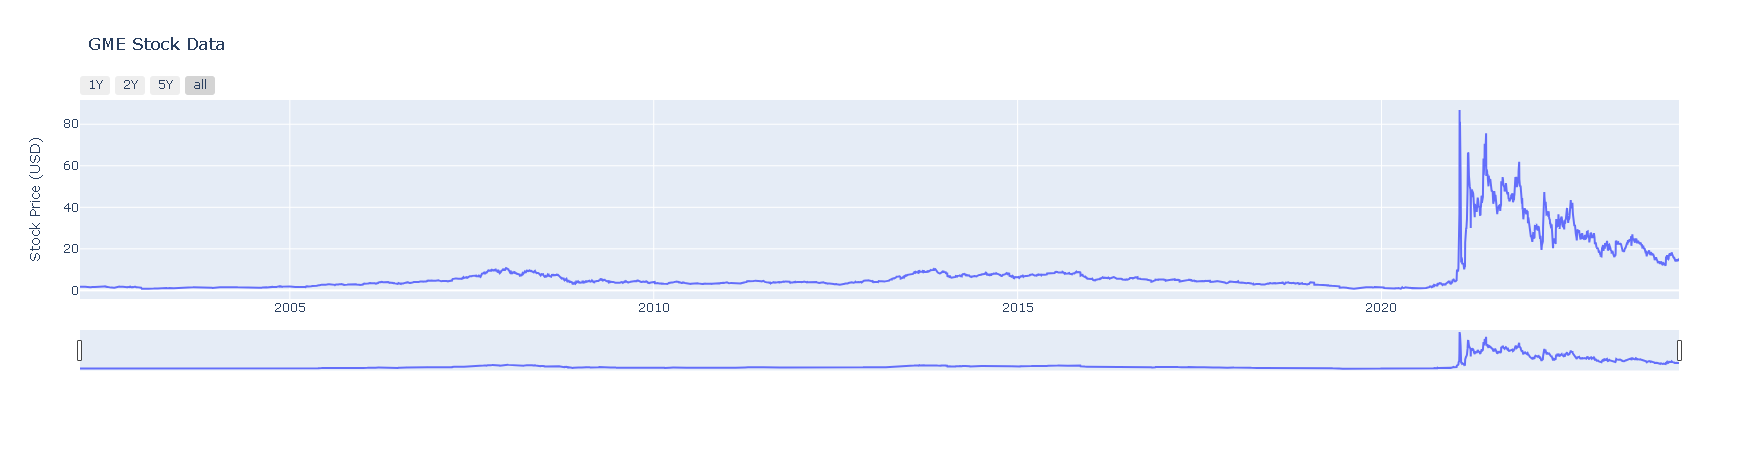

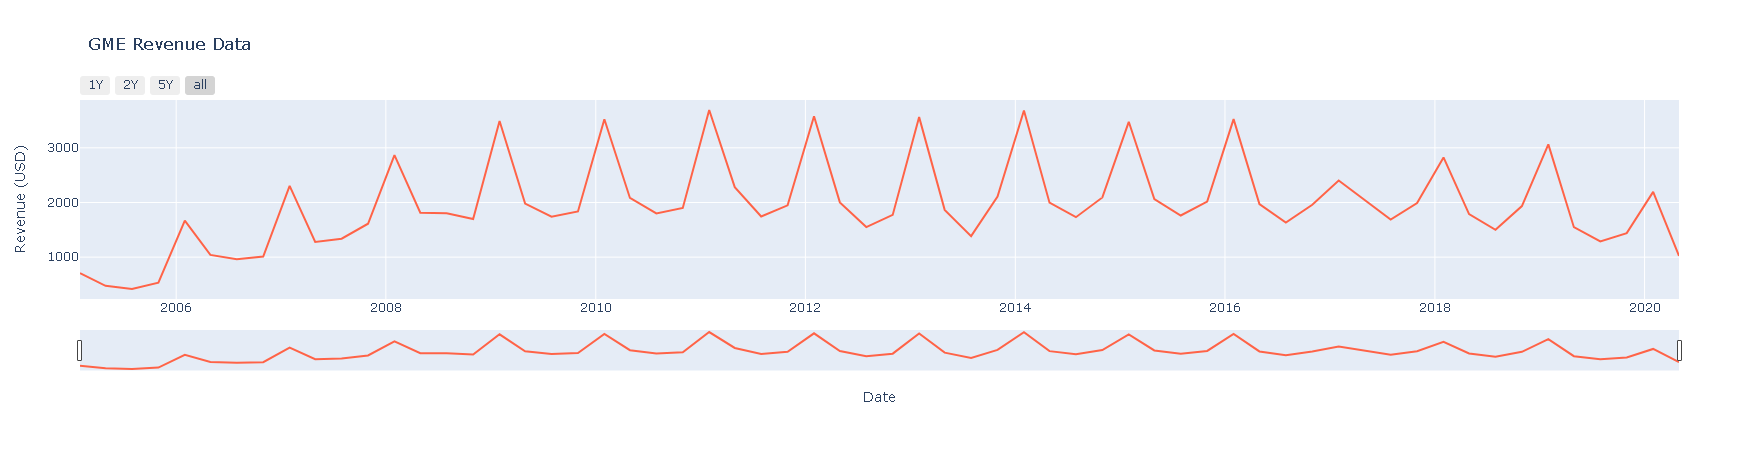

In [119]:
import plotly.graph_objects as go

# Assuming gme_data and gme_revenue are pre-defined DataFrames
# with 'Date', 'Close', and 'Revenue' columns in the correct format.

# First plot: Historical Share Price with a range slider
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=GME_data['Date'], y=GME_data['Close'], name="Close")
)

# Add range slider
fig.update_layout(
    title="GME Stock Data",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(count=2, label="2Y", step="year", stepmode="backward"),
                dict(count=5, label="5Y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis_title='Stock Price (USD)'
)

# Please make sure the 'Date' column in your gme_revenue DataFrame is named 'Date'
# and the 'Revenue' column is appropriately named and cleaned of any non-numeric characters.
# Sort the revenue data by date
gme_revenue.sort_values('GameStop Quarterly Revenue(Millions of US $)', inplace=True)

# Second plot: Historical Revenue
fig2 = go.Figure()
fig2.add_trace(
    go.Scatter(x=gme_revenue['GameStop Quarterly Revenue(Millions of US $)'], y=gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'], name="Revenue", marker_color='rgb(255, 99, 71)')
)

# Update layout for the second plot
fig2.update_layout(
    title="GME Revenue Data",
    xaxis_title="Date",
    yaxis_title='Revenue (USD)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1Y', step='year', stepmode='backward'),
                dict(count=2, label='2Y', step='year', stepmode='backward'),
                dict(count=5, label='5Y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(
        title='Revenue (USD)',
        type='linear'
    )
)

# Show the figures
fig.show()
fig2.show()


In [117]:
print(GME_data.columns)
print(gme_revenue.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
Index(['GameStop Quarterly Revenue(Millions of US $)', 'GameStop Quarterly Revenue(Millions of US $).1'], dtype='object')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
